In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder #para tratamento de atributos categóricos, transforma string em número
from sklearn.preprocessing import OneHotEncoder #codificar os valores das variáveis para evitar interpretação errada do algorítmo
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler #para padronização dos dados
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold # validaçaõ cruzada

In [2]:
titanic_train= pd.read_csv('train.csv')

In [3]:
#importando arquivo de teste
titanic_test= pd.read_csv('test.csv')

In [4]:
# Preenchendo coluna Survived com 3 e reordenando colunas
titanic_test['Survived']=titanic_test.apply(lambda x:'3', axis=1)
titanic_test[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked']]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,3,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,3,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
titanic_completo= pd.concat([titanic_train, titanic_test])
titanic_completo

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,3,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
# verificando informações do df
titanic_completo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   object 
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 132.9+ KB


In [7]:
# verificando informações do df
titanic_completo.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [8]:
#identificando valores faltantes da variável idade
titanic_completo['Age'].isnull().sum()

263

In [9]:
# susbstituindo faltantes da idade pela média
media= titanic_completo.query("Age > 0")['Age'].mean()
titanic_completo['Age'].fillna(media, inplace=True)

In [10]:
# Substituindo faltantes de fare
media_fare= titanic_completo.query('Fare > 0')['Fare'].mean()
titanic_completo['Fare'].fillna(media_fare, inplace=True)

In [11]:
# Substituir faltantes em Cabin, separando a primeira letra e criando nova coluna no df

titanic_completo["Cabin"].fillna('ww', inplace=True)

letras_cabines=[]
for i in titanic_completo["Cabin"]:
   letras_cabines.append(list(i)[0])

titanic_completo['Cabin2']=letras_cabines

titanic_completo=titanic_completo[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin2', 'Embarked']]

In [12]:
# separando o título de cada passageiro e inserindo coluna no df
lista_nomes=[]
for i in titanic_completo['Name']:
   lista_nomes.append(i.split()[1])

titanic_completo['Name2']=lista_nomes

titanic_completo=titanic_completo[['PassengerId', 'Survived','Pclass', 'Name2', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin2', 'Embarked']]

In [13]:
#analisando a correlação da variável ticket com a variável target

pd.set_option('display.max_rows',1000)
#titanic_train[['Ticket', 'Survived']].sort_values(by=['Ticket'])

In [14]:
#extraindo primeira letra da variável Ticket
tickets=[]
for i in titanic_completo['Ticket']:
    tickets.append(list(i)[0])

#Extraindo valores únicos 
#set(tickets)

titanic_completo['Ticket2']=tickets

#incluindo nova coluna no df
titanic_completo=titanic_completo[['PassengerId', 'Survived','Pclass', 'Name2', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket2', 'Fare', 'Cabin2', 'Embarked']]

In [15]:
#comprovando que os diferentes tickets tem comportamentos diferentes em relação a variável target
#pd.DataFrame(titanic_completo[['Ticket2', 'Survived']].groupby(['Ticket2', 'Survived']).size(), columns=["Quantidade"])

In [16]:
titanic_completo.head()

,PassengerId,Survived,Pclass,Name2,Sex,Age,SibSp,Parch,Ticket2,Fare,Cabin2,Embarked
0,1,0,3,Mr.,male,22.0,1,0,A,7.2500,w,S
1,2,1,1,Mrs.,female,38.0,1,0,P,71.2833,C,C
2,3,1,3,Miss.,female,26.0,0,0,S,7.9250,w,S
3,4,1,1,Mrs.,female,35.0,1,0,1,53.1000,C,S
4,5,0,3,Mr.,male,35.0,0,0,3,8.0500,w,S


In [17]:
titanic_completo['Survived']=titanic_completo['Survived'].astype(int)

In [18]:
titanic_completo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int32  
 2   Pclass       1309 non-null   int64  
 3   Name2        1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket2      1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin2       1309 non-null   object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 127.8+ KB


In [19]:
titanic_completo[titanic_completo['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name2,Sex,Age,SibSp,Parch,Ticket2,Fare,Cabin2,Embarked
61,62,1,1,Miss.,female,38.0,0,0,1,80.0,B,NaN
829,830,1,1,Mrs.,female,62.0,0,0,1,80.0,B,NaN


In [20]:
titanic_completo['Embarked'].fillna('S', inplace=True)

#### <font color='yellow' > Criando X/y e aplicando LabelEncoder e verificando a correlação </font >

In [21]:
#criando X e y
y_titanic= titanic_completo.iloc[:,1].values
X_titanic= titanic_completo.iloc[:,2:12].values
X_titanic

array([[3, 'Mr.', 'male', ..., 7.25, 'w', 'S'],
       [1, 'Mrs.', 'female', ..., 71.2833, 'C', 'C'],
       [3, 'Miss.', 'female', ..., 7.925, 'w', 'S'],
       ...,
       [3, 'Mr.', 'male', ..., 7.25, 'w', 'S'],
       [3, 'Mr.', 'male', ..., 8.05, 'w', 'S'],
       [3, 'Master.', 'male', ..., 22.3583, 'w', 'C']], dtype=object)

In [22]:
#Transformando categóricos em numéricos com o LabelEncoder
label_encoder_Name2 = LabelEncoder()
label_encoder_Sex = LabelEncoder()
label_encoder_Ticket2 = LabelEncoder()
label_encoder_Cabin2 = LabelEncoder()
label_encoder_Embarked = LabelEncoder()

X_titanic[:,1] = label_encoder_Name2.fit_transform(X_titanic[:,1])
X_titanic[:,2] = label_encoder_Sex.fit_transform(X_titanic[:,2])
X_titanic[:,6] = label_encoder_Ticket2.fit_transform(X_titanic[:,6])
X_titanic[:,8] = label_encoder_Cabin2.fit_transform(X_titanic[:,8])
X_titanic[:,9] = label_encoder_Embarked.fit_transform(X_titanic[:,9])

In [23]:
target=titanic_completo['Survived'].values
target=target.reshape(-1,1)

In [24]:
target

array([[0],
       [1],
       [1],
       ...,
       [3],
       [3],
       [3]])

In [25]:
np.concatenate((target, X_titanic),axis=1)

array([[0, 3, 19, ..., 7.25, 8, 2],
       [1, 1, 20, ..., 71.2833, 2, 0],
       [1, 3, 16, ..., 7.925, 8, 2],
       ...,
       [3, 3, 19, ..., 7.25, 8, 2],
       [3, 3, 19, ..., 8.05, 8, 2],
       [3, 3, 13, ..., 22.3583, 8, 0]], dtype=object)

In [26]:
titanic_completo_encoder= pd.DataFrame(np.concatenate((target, X_titanic),axis=1), columns=['Survived','Pclass', 'Name2', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket2', 'Fare',
       'Cabin2', 'Embarked'])

titanic_completo_encoder= titanic_completo_encoder.iloc[:891,:]
correlacao= titanic_completo_encoder.astype(float).corr()
correlacao

,Survived,Pclass,Name2,Sex,Age,SibSp,Parch,Ticket2,Fare,Cabin2,Embarked
Survived,1.000000,-0.338481,-0.124043,-0.543351,-0.070323,-0.035322,0.081629,-0.036178,0.257307,-0.301116,-0.167675
Pclass,-0.338481,1.000000,0.011772,0.131900,-0.330367,0.083081,0.018443,-0.003277,-0.549500,0.746616,0.162098
Name2,-0.124043,0.011772,1.000000,0.117257,0.181030,-0.172645,-0.150777,0.020164,-0.045865,0.028779,0.029372
Sex,-0.543351,0.131900,0.117257,1.000000,0.084461,-0.114631,-0.245489,0.031341,-0.182333,0.123076,0.108262
Age,-0.070323,-0.330367,0.181030,0.084461,1.000000,-0.232515,-0.179882,0.007230,0.091002,-0.248381,-0.027602
SibSp,-0.035322,0.083081,-0.172645,-0.114631,-0.232515,1.000000,0.414838,0.049331,0.159651,0.041540,0.068230
Parch,0.081629,0.018443,-0.150777,-0.245489,-0.179882,0.414838,1.000000,0.015628,0.216225,-0.032548,0.039798
Ticket2,-0.036178,-0.003277,0.020164,0.031341,0.007230,0.049331,0.015628,1.000000,0.142551,0.043634,-0.058472
Fare,0.257307,-0.549500,-0.045865,-0.182333,0.091002,0.159651,0.216225,0.142551,1.000000,-0.523013,-0.224719
Cabin2,-0.301116,0.746616,0.028779,0.123076,-0.248381,0.041540,-0.032548,0.043634,-0.523013,1.000000,0.194255


<AxesSubplot:>

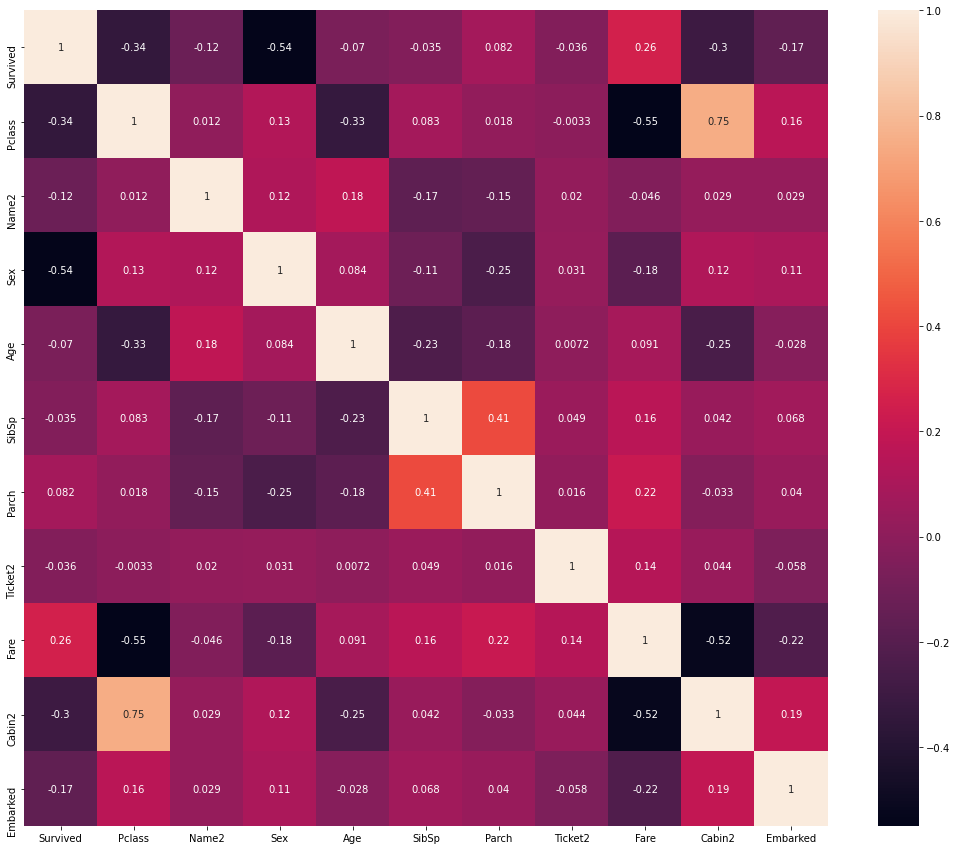

In [27]:
plt.figure(figsize=(18,15))
sns.heatmap(correlacao, annot=True)

#### <font color='yellow' > Recriando X/y e aplicando LabelEncoder somente nas variáveis selecionadas </font >

In [28]:
#recriando X e y
y_titanic= titanic_completo.iloc[:,1].values
X_titanic= titanic_completo[['Pclass','Sex','Fare', 'Cabin2', 'Embarked', 'Name2']].values
X_titanic

array([[3, 'male', 7.25, 'w', 'S', 'Mr.'],
       [1, 'female', 71.2833, 'C', 'C', 'Mrs.'],
       [3, 'female', 7.925, 'w', 'S', 'Miss.'],
       ...,
       [3, 'male', 7.25, 'w', 'S', 'Mr.'],
       [3, 'male', 8.05, 'w', 'S', 'Mr.'],
       [3, 'male', 22.3583, 'w', 'C', 'Master.']], dtype=object)

In [29]:
#Transformando categóricos em numéricos com o LabelEncoder
label_encoder_Sex = LabelEncoder()
label_encoder_Cabin2 = LabelEncoder()
label_encoder_Embarked = LabelEncoder()
label_encoder_Name2 = LabelEncoder()

X_titanic[:,1] = label_encoder_Sex.fit_transform(X_titanic[:,1])
X_titanic[:,3] = label_encoder_Cabin2.fit_transform(X_titanic[:,3])
X_titanic[:,4] = label_encoder_Cabin2.fit_transform(X_titanic[:,4])
X_titanic[:,5] = label_encoder_Name2.fit_transform(X_titanic[:,5])

In [30]:
#Codificando com o OneHotEncoder os dados CATERÓRICOS
onehotencoder_X_titanic= ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [0,1,3,4,5])], 
                                                 remainder='passthrough')

X_titanic = onehotencoder_X_titanic.fit_transform(X_titanic).toarray()
X_titanic

array([[ 0.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  7.25  ],
       [ 1.    ,  0.    ,  0.    , ...,  0.    ,  0.    , 71.2833],
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  7.25  ],
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  8.05  ],
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  0.    , 22.3583]])

In [31]:
X_titanic.shape

(1309, 52)

In [32]:
#criando treino e teste
X_titanic_train= X_titanic[0:891]
y_titanic_train= y_titanic[0:891]
X_titanic_test= X_titanic[891:]

In [33]:
np.unique(y_titanic_train, return_counts=True)

(array([0, 1]), array([549, 342], dtype=int64))

In [34]:
X_titanic_train.shape, y_titanic_train.shape, X_titanic_test.shape

((891, 52), (891,), (418, 52))

In [35]:
# Escalonamento dos valores
scaler_titanic= StandardScaler()
X_titanic_train = scaler_titanic.fit_transform(X_titanic_train)
X_titanic_test = scaler_titanic.fit_transform(X_titanic_test)

In [36]:
X_titanic_train.shape, y_titanic_train.shape, X_titanic_test.shape

((891, 52), (891,), (418, 52))

In [37]:
#validando o modelo com a validação cruzada
randon_forest_titanic = RandomForestClassifier(n_estimators=100, criterion='entropy')
scores= cross_val_score(randon_forest_titanic, X_titanic_train, y_titanic_train, cv=5)
scores.mean()

0.8069738246186681

In [38]:
#treinando o modelo
randon_forest_titanic.fit(X_titanic_train, y_titanic_train)

RandomForestClassifier(criterion='entropy')

In [39]:
#gerando previsões sobre a base de teste com o modelo treinado

In [40]:
previsoes= randon_forest_titanic.predict(X_titanic_test)
previsoes

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [41]:
sub=pd.Series(previsoes, index=titanic_test['PassengerId'], name='Survived')
sub

PassengerId
892     0
893     0
894     0
895     0
896     1
897     0
898     0
899     0
900     1
901     0
902     0
903     0
904     1
905     0
906     1
907     1
908     0
909     0
910     1
911     1
912     0
913     1
914     1
915     0
916     1
917     0
918     1
919     0
920     0
921     0
922     0
923     0
924     0
925     0
926     1
927     0
928     1
929     0
930     0
931     0
932     0
933     0
934     0
935     1
936     1
937     0
938     0
939     0
940     1
941     0
942     0
943     0
944     1
945     1
946     0
947     0
948     0
949     0
950     0
951     1
952     0
953     0
954     0
955     0
956     1
957     1
958     0
959     0
960     0
961     1
962     0
963     0
964     1
965     1
966     1
967     0
968     0
969     1
970     0
971     0
972     1
973     0
974     0
975     0
976     0
977     0
978     0
979     1
980     0
981     1
982     0
983     0
984     1
985     0
986     1
987     0
988     1
989     0
990     

In [42]:
sub.to_csv('Sextoo_modelo.csv', header=True)